In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import statsmodels.formula.api as smf


# 1) Delivery_time -> Predict delivery time using sorting time

In [4]:
data=pd.read_csv("delivery_time.csv")

In [5]:
data.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [6]:
data.shape

(21, 2)

In [7]:

#EDA & Visualization
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [8]:
data

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [9]:
data=data.rename({'Delivery Time':'delivery_time','Sorting Time':'sorting_time'},axis=1)

In [11]:
data

,delivery_time,sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [12]:
# Correction
data.corr()

,delivery_time,sorting_time
delivery_time,1.000000,0.825997
sorting_time,0.825997,1.000000


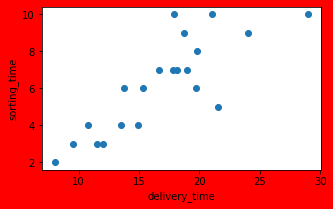

In [13]:

plt.figure(figsize=(5,3),facecolor='red')
plt.scatter(data['delivery_time'],data['sorting_time'])
plt.xlabel('delivery_time')
plt.ylabel('sorting_time')
plt.show()

C:\Users\Hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='delivery_time', ylabel='Density'>

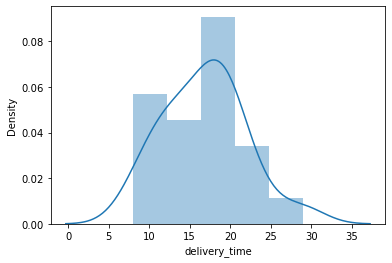

In [14]:
sns.distplot(data['delivery_time'])

C:\Users\Hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sorting_time', ylabel='Density'>

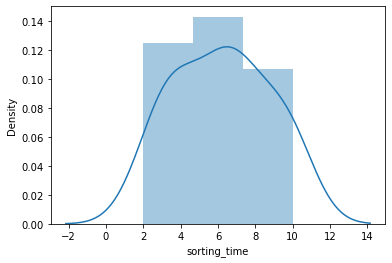

In [15]:
sns.distplot(data['sorting_time'])

In [16]:
X=data['delivery_time'].values.reshape(21,1)
Y=data['sorting_time'].values.reshape(21,1)

In [17]:
X

array([[21.  ],
       [13.5 ],
       [19.75],
       [24.  ],
       [29.  ],
       [15.35],
       [19.  ],
       [ 9.5 ],
       [17.9 ],
       [18.75],
       [19.83],
       [10.75],
       [16.68],
       [11.5 ],
       [12.03],
       [14.88],
       [13.75],
       [18.11],
       [ 8.  ],
       [17.83],
       [21.5 ]])

In [19]:
Y

array([[10],
       [ 4],
       [ 6],
       [ 9],
       [10],
       [ 6],
       [ 7],
       [ 3],
       [10],
       [ 9],
       [ 8],
       [ 4],
       [ 7],
       [ 3],
       [ 3],
       [ 4],
       [ 6],
       [ 7],
       [ 2],
       [ 7],
       [ 5]], dtype=int64)

In [22]:
LR=LinearRegression()
model=LR.fit(Y,X)

In [23]:
model.coef_

array([[1.6490199]])

In [24]:
model.intercept_

array([6.58273397])

In [25]:
predictions=model.predict(Y)
predictions

array([[23.07293294],
       [13.17881356],
       [16.47685335],
       [21.42391304],
       [23.07293294],
       [16.47685335],
       [18.12587325],
       [11.52979366],
       [23.07293294],
       [21.42391304],
       [19.77489315],
       [13.17881356],
       [18.12587325],
       [11.52979366],
       [11.52979366],
       [13.17881356],
       [16.47685335],
       [18.12587325],
       [ 9.88077377],
       [18.12587325],
       [14.82783346]])

In [26]:
pd.DataFrame({'delivery_time':X.flatten(),
             'sorting_time':Y.flatten(),
             'Predictions':predictions.flatten()})

,delivery_time,sorting_time,Predictions
0,21.00,10,23.072933
1,13.50,4,13.178814
2,19.75,6,16.476853
3,24.00,9,21.423913
4,29.00,10,23.072933
5,15.35,6,16.476853
6,19.00,7,18.125873
7,9.50,3,11.529794
8,17.90,10,23.072933
9,18.75,9,21.423913


<AxesSubplot:xlabel='sorting_time', ylabel='delivery_time'>

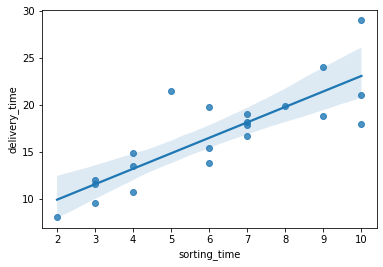

In [27]:
sns.regplot(x=data['sorting_time'],y=data['delivery_time'])

In [28]:
#build a modul
model=smf.ols("delivery_time~np.log(sorting_time)",data=data).fit()

In [29]:
model

In [30]:
model.params

Intercept               1.159684
np.log(sorting_time)    9.043413
dtype: float64

In [31]:
model.tvalues

Intercept               0.472460
np.log(sorting_time)    6.586789
dtype: float64

In [32]:
model.tvalues

Intercept               0.472460
np.log(sorting_time)    6.586789
dtype: float64

In [33]:
model.rsquared

0.6954434611324223

In [34]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          delivery_time   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     43.39
Date:                Thu, 22 Dec 2022   Prob (F-statistic):           2.64e-06
Time:                        01:53:29   Log-Likelihood:                -50.912
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                1.1597      2.455      0.472      0.642      -3.978       6.297
np.log(sorting_time)     9.0434      1.373      6.587      0.000       6.170      11.917
==============================================================================
Omnibus:                        5.552   Durbin-Watson:                   1.427
Prob(Omnibus):                  0.062   Jarque-Bera (JB):                3.481
Skew:                           0.946   Prob(JB):                        0.175
Kurtosis:                       3.628   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [35]:
model2=smf.ols("sorting_time~np.log(delivery_time)",data=data).fit()

In [36]:
model2

In [37]:
model2.params

Intercept               -12.499233
np.log(delivery_time)     6.735548
dtype: float64

In [39]:
model2.tvalues

Intercept               -4.543446
np.log(delivery_time)    6.836088
dtype: float64

In [40]:
model2.pvalues

Intercept                0.000222
np.log(delivery_time)    0.000002
dtype: float64

In [41]:
model.rsquared

0.6954434611324223

In [42]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           sorting_time   R-squared:                       0.711
Model:                            OLS   Adj. R-squared:                  0.696
Method:                 Least Squares   F-statistic:                     46.73
Date:                Thu, 22 Dec 2022   Prob (F-statistic):           1.59e-06
Time:                        01:56:18   Log-Likelihood:                -35.846
No. Observations:                  21   AIC:                             75.69
Df Residuals:                      19   BIC:                             77.78
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept               -12.4992      2.751     -4.543      0.000     -18.257      -6.741
np.log(delivery_time)     6.7355      0.985      6.836      0.000       4.673       8.798
==============================================================================
Omnibus:                        1.323   Durbin-Watson:                   1.202
Prob(Omnibus):                  0.516   Jarque-Bera (JB):                0.242
Skew:                          -0.025   Prob(JB):                        0.886
Kurtosis:                       3.523   Cond. No.                         28.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [44]:
data['sorting_time_Square']=data['sorting_time']**2
model3=smf.ols("np.log(delivery_time)~sorting_time+sorting_time_Square",data=data).fit()
model3

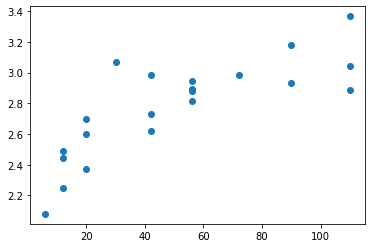

In [45]:
plt.scatter(data['sorting_time']+data['sorting_time_Square'],np.log(data['delivery_time']))

In [46]:
model3.params

Intercept              1.699704
sorting_time           0.265922
sorting_time_Square   -0.012841
dtype: float64

In [47]:
model3.tvalues

Intercept              7.440736
sorting_time           3.314818
sorting_time_Square   -2.031650
dtype: float64

In [49]:
model3.pvalues

Intercept              6.771099e-07
sorting_time           3.853154e-03
sorting_time_Square    5.721977e-02
dtype: float64

In [52]:
model3.rsquared

0.764866634295373

In [53]:
data['reciprocal_sorting_time']=1/data['sorting_time']
model4=smf.ols("np.log(delivery_time)~reciprocal_sorting_time",data=data).fit()

In [54]:
model4.params

Intercept                  3.302922
reciprocal_sorting_time   -2.660538
dtype: float64

In [55]:
model4.tvalues

Intercept                  43.629523
reciprocal_sorting_time    -7.843895
dtype: float64

In [56]:
model4.rsquared

0.7640533808614293

In [57]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          delivery_time   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     43.39
Date:                Thu, 22 Dec 2022   Prob (F-statistic):           2.64e-06
Time:                        02:03:07   Log-Likelihood:                -50.912
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                1.1597      2.455      0.472      0.642      -3.978       6.297
np.log(sorting_time)     9.0434      1.373      6.587      0.000       6.170      11.917
==============================================================================
Omnibus:                        5.552   Durbin-Watson:                   1.427
Prob(Omnibus):                  0.062   Jarque-Bera (JB):                3.481
Skew:                           0.946   Prob(JB):                        0.175
Kurtosis:                       3.628   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# 2) Salary_hike -> Build a prediction model for Salary_hike


In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import statsmodels.formula.api as smf

In [62]:
data=pd.read_csv('Salary_Data.csv')

In [63]:
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [64]:
data.tail()

,YearsExperience,Salary
25,9.0,105582.0
26,9.5,116969.0
27,9.6,112635.0
28,10.3,122391.0
29,10.5,121872.0


In [65]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [66]:
data.shape

(30, 2)

In [67]:
data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [68]:
data.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


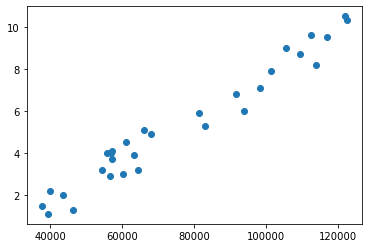

In [70]:
plt.scatter(data['Salary'],data['YearsExperience'])

C:\Users\Hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Salary', ylabel='Density'>

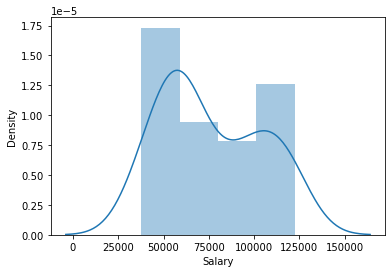

In [71]:
sns.distplot(data['Salary'])

C:\Users\Hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='YearsExperience', ylabel='Density'>

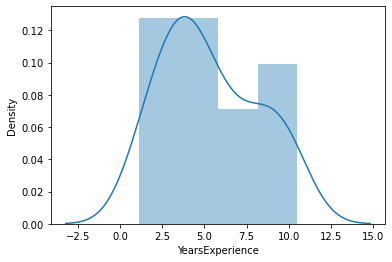

In [72]:
sns.distplot(data['YearsExperience'])

<AxesSubplot:xlabel='Salary', ylabel='YearsExperience'>

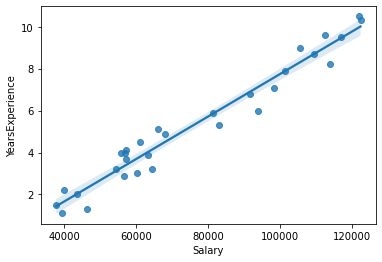

In [73]:
sns.regplot(x='Salary',y='YearsExperience',data=data)

In [74]:
model =smf.ols('Salary~YearsExperience',data=data).fit()

In [75]:
model.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [76]:
model.tvalues

Intercept          11.346940
YearsExperience    24.950094
dtype: float64

In [77]:
model.pvalues

Intercept          5.511950e-12
YearsExperience    1.143068e-20
dtype: float64

In [78]:
model.rsquared

0.9569566641435086

In [79]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Thu, 22 Dec 2022   Prob (F-statistic):           1.14e-20
Time:                        02:08:48   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

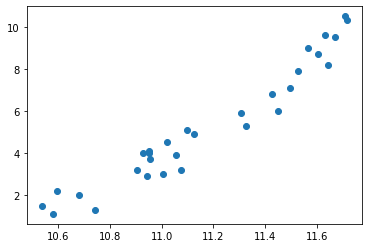

In [80]:
plt.scatter(np.log(data['Salary']),data['YearsExperience'])

In [81]:
model2=smf.ols("Salary~np.log(YearsExperience)",data=data).fit()

In [82]:
model2.params

Intercept                  14927.97177
np.log(YearsExperience)    40581.98796
dtype: float64

In [83]:
model2.tvalues

Intercept                   2.895135
np.log(YearsExperience)    12.791989
dtype: float64

In [84]:
model2.pvalues

Intercept                  7.268813e-03
np.log(YearsExperience)    3.250155e-13
dtype: float64

In [85]:
model2.rsquared

0.8538888828756969

In [86]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     163.6
Date:                Thu, 22 Dec 2022   Prob (F-statistic):           3.25e-13
Time:                        02:10:30   Log-Likelihood:                -319.77
No. Observations:                  30   AIC:                             643.5
Df Residuals:                      28   BIC:                             646.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                1.493e+04   5156.226      2.895      0.007    4365.921    2.55e+04
np.log(YearsExperience)  4.058e+04   3172.453     12.792      0.000    3.41e+04    4.71e+04
==============================================================================
Omnibus:                        1.094   Durbin-Watson:                   0.512
Prob(Omnibus):                  0.579   Jarque-Bera (JB):                0.908
Skew:                           0.156   Prob(JB):                        0.635
Kurtosis:                       2.207   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

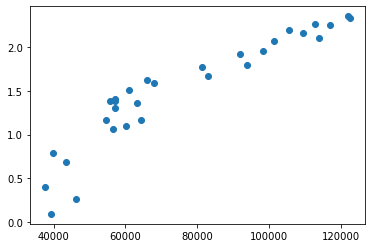

In [87]:
plt.scatter(data["Salary"],np.log(data["YearsExperience"]))

In [88]:
model3=smf.ols("YearsExperience~np.log(Salary)",data=data).fit()

In [89]:
model3.params

Intercept        -77.696132
np.log(Salary)     7.428821
dtype: float64

In [90]:
model3.tvalues

Intercept        -18.321589
np.log(Salary)    19.584833
dtype: float64

In [91]:
model3.pvalues

Intercept         3.988518e-17
np.log(Salary)    7.027439e-18
dtype: float64

In [92]:
model3.rsquared

0.9319671194084195

In [94]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        YearsExperience   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     383.6
Date:                Thu, 22 Dec 2022   Prob (F-statistic):           7.03e-18
Time:                        02:11:53   Log-Likelihood:                -33.035
No. Observations:                  30   AIC:                             70.07
Df Residuals:                      28   BIC:                             72.87
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        -77.6961      4.241    -18.322      0.000     -86.383     -69.009
np.log(Salary)     7.4288      0.379     19.585      0.000       6.652       8.206
==============================================================================
Omnibus:                        1.748   Durbin-Watson:                   1.348
Prob(Omnibus):                  0.417   Jarque-Bera (JB):                1.213
Skew:                          -0.227   Prob(JB):                        0.545
Kurtosis:                       2.126   Cond. No.                         347.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [95]:
data['YearsExperience_Square']=data['YearsExperience']**2
model4=smf.ols("np.log(Salary)~YearsExperience+YearsExperience_Square",data=data).fit()
model4

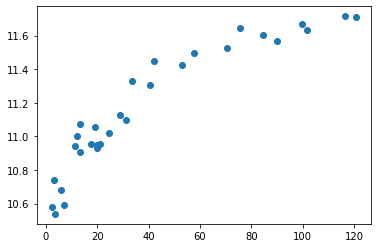

In [96]:
plt.scatter(data['YearsExperience']+data['YearsExperience_Square'],np.log(data['Salary']))

In [97]:
model4.params

Intercept                 10.336852
YearsExperience            0.202382
YearsExperience_Square    -0.006614
dtype: float64

In [98]:
model4.tvalues

Intercept                 154.368412
YearsExperience             7.601136
YearsExperience_Square     -2.957139
dtype: float64

In [99]:
model4.pvalues

Intercept                 2.559532e-41
YearsExperience           3.551262e-08
YearsExperience_Square    6.380581e-03
dtype: float64

In [100]:
model4.rsquared

0.948610863848735

In [101]:
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         np.log(Salary)   R-squared:                       0.949
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     249.2
Date:                Thu, 22 Dec 2022   Prob (F-statistic):           3.95e-18
Time:                        02:13:47   Log-Likelihood:                 32.391
No. Observations:                  30   AIC:                            -58.78
Df Residuals:                      27   BIC:                            -54.58
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 10.3369      0.067    154.368      0.000      10.199      10.474
YearsExperience            0.2024      0.027      7.601      0.000       0.148       0.257
YearsExperience_Square    -0.0066      0.002     -2.957      0.006      -0.011      -0.002
==============================================================================
Omnibus:                        1.099   Durbin-Watson:                   1.845
Prob(Omnibus):                  0.577   Jarque-Bera (JB):                1.002
Skew:                           0.260   Prob(JB):                        0.606
Kurtosis:                       2.271   Cond. No.                         223.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [102]:
data['reciprocal_YearsExperience']=1/data['YearsExperience']
model5=smf.ols("np.log(Salary)~reciprocal_YearsExperience",data=data).fit()

In [103]:
model5.params

Intercept                     11.584990
reciprocal_YearsExperience    -1.506515
dtype: float64

In [104]:
model5.tvalues

Intercept                     178.556014
reciprocal_YearsExperience     -7.848682
dtype: float64

In [105]:
model5.pvalues

Intercept                     2.398014e-44
reciprocal_YearsExperience    1.504043e-08
dtype: float64

In [106]:
model5.rsquared

0.6875062998233084

In [107]:
model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         np.log(Salary)   R-squared:                       0.688
Model:                            OLS   Adj. R-squared:                  0.676
Method:                 Least Squares   F-statistic:                     61.60
Date:                Thu, 22 Dec 2022   Prob (F-statistic):           1.50e-08
Time:                        02:15:16   Log-Likelihood:                 5.3140
No. Observations:                  30   AIC:                            -6.628
Df Residuals:                      28   BIC:                            -3.826
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                     11.5850      0.065    178.556      0.000      11.452      11.718
reciprocal_YearsExperience    -1.5065      0.192     -7.849      0.000      -1.900      -1.113
==============================================================================
Omnibus:                        8.949   Durbin-Watson:                   0.343
Prob(Omnibus):                  0.011   Jarque-Bera (JB):                2.329
Skew:                           0.141   Prob(JB):                        0.312
Kurtosis:                       1.665   Cond. No.                         5.40
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""